### 課題①コメント

説明変数が"LSTAT"の場合、２乗和誤差は以下のようになりました。

1次：　15.537906007479375<br>
2次：　10.920226905348915<br>
3次：　10.055225709746377<br>
4次：　9.6173907154166809<br>

4次関数が最もよくフィッティングをしていることが分かった。<br>
ただし、この時点ではモデルのテストを実施していないので、過学習である可能性はある。

### 課題②コメント

説明変数を"AGE"とした場合、２乗和誤差は以下のようになりました。

1次：　26.754508704139507<br>
2次：　24.397088136515958<br>
3次：　23.978242199677439<br>
4次：　23.956816976819287<br>

2次より高い次数の関数に関しては、どれも大きな差が見られないが、4次関数が若干良いフィッティングを示している。<br>
ただし、この時点ではモデルのテストを実施していないので、特に高次でも差分が見られないのであれば、2次関数以下としてもよいかもしれない。<br>
やみくもに次数をあげても、やはり過学習になる可能性が出てくる。

### 線形回帰

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
boston = load_boston()

X = pd.DataFrame(boston.data[:100, :], columns = boston.feature_names)
y = boston.target[:100]
#データを100個に限っているのは後でグラフをプロットしたときの様子を見やすくするためです。

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88

- CRIM    
人口 1 人当たりの犯罪発生数<br>
- ZN	    
25,000 平方フィート以上の住居区画の占める割合<br>
- INDUS	 
小売業以外の商業が占める面積の割合<br>
- CHAS	 
チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)<br>
- NOX	  
NOx の濃度<br>
- RM	   
住居の平均部屋数<br>
- AGE	   
1940 年より前に建てられた物件の割合<br>
- DIS	    
5 つのボストン市の雇用施設からの距離 (重み付け済)<br>
- RAD	  
環状高速道路へのアクセスしやすさ<br>
- TAX	  
$10,000 ドルあたりの不動産税率の総計<br>
- PTRATIO	
町毎の児童と教師の比率<br>
- B	       
町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2<br>
- LSTAT	
給与の低い職業に従事する人口の割合 (%)<br>

In [4]:
y

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,  33.2])

In [5]:
x = X['LSTAT'].values # numpy arrayへデータを写す
x

array([  4.98,   9.14,   4.03,   2.94,   5.33,   5.21,  12.43,  19.15,
        29.93,  17.1 ,  20.45,  13.27,  15.71,   8.26,  10.26,   8.47,
         6.58,  14.67,  11.69,  11.28,  21.02,  13.83,  18.72,  19.88,
        16.3 ,  16.51,  14.81,  17.28,  12.8 ,  11.98,  22.6 ,  13.04,
        27.71,  18.35,  20.34,   9.68,  11.41,   8.77,  10.13,   4.32,
         1.98,   4.84,   5.81,   7.44,   9.55,  10.21,  14.15,  18.8 ,
        30.81,  16.2 ,  13.45,   9.43,   5.28,   8.43,  14.8 ,   4.81,
         5.77,   3.95,   6.86,   9.22,  13.15,  14.44,   6.73,   9.5 ,
         8.05,   4.67,  10.24,   8.1 ,  13.09,   8.79,   6.72,   9.88,
         5.52,   7.54,   6.78,   8.94,  11.97,  10.27,  12.34,   9.1 ,
         5.29,   7.22,   6.72,   7.51,   9.62,   6.53,  12.86,   8.44,
         5.5 ,   5.7 ,   8.81,   8.2 ,   8.16,   6.21,  10.59,   6.65,
        11.34,   4.21,   3.57,   6.19])

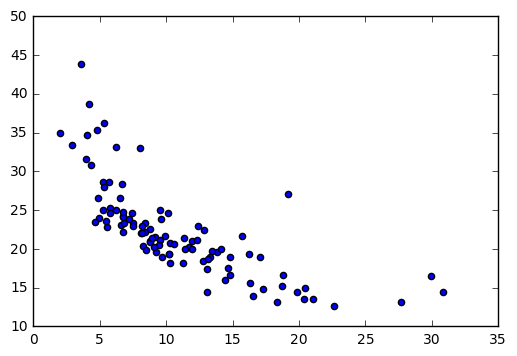

In [6]:
plt.scatter(x,y)

In [7]:
# 線形回帰モデルの箱を作成

from sklearn.linear_model import LinearRegression
lin_1d = LinearRegression()

In [8]:
# 線形回帰に学習させる
# sklearnでは、fit関数の引数xは行列にすること！

lin_1d.fit(x[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# 配列の次元数を表す属性（1: ベクトル、2: 行列）

x.ndim

1

In [10]:
# xをベクトルから行列へ変換

x[:, None].ndim

2

In [11]:
lin_1d.predict(2)

array([ 29.09604558])

In [12]:
lin_1d.predict(10)

array([ 22.90694453])

[]

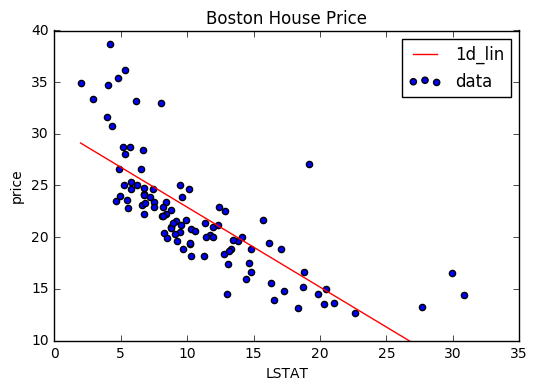

In [13]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_1d_fit = lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x, y, label = 'data')
plt.plot(n, y_1d_fit, color='red', label = '1d_lin')

plt.ylim(10, 40) #グラフを見やすくするためにｙ軸のプロット範囲を絞っているだけです。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()

plt.plot()

In [14]:
lin_1d.predict(25)

array([ 11.30238006])

### 多項式回帰

In [15]:
from sklearn.preprocessing import PolynomialFeatures

degree_2 = PolynomialFeatures(degree=2)

In [16]:
x_2 = degree_2.fit_transform(x[:, None])

In [17]:
lin_2d = LinearRegression()
lin_2d.fit(x_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[]

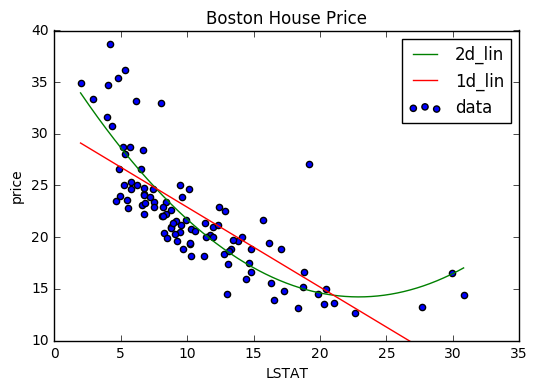

In [18]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x), np.max(x), 1000)
y_2d_fit = lin_2d.predict(degree_2.fit_transform(n[:, np.newaxis]))
y_1d_fit = lin_1d.predict(n[:, np.newaxis])

plt.title("Boston House Price")
plt.scatter(x, y, label='data')
plt.plot(n, y_2d_fit, 'g', label='2d_lin')
plt.plot(n, y_1d_fit, 'r', label='1d_lin')

plt.ylim(10, 40)#グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()

plt.plot()

In [19]:
from sklearn.metrics import mean_squared_error

#まずは1次関数の2乗和誤差をみてみましょう
mean_squared_error(y, lin_1d.predict(x[:,None]))

15.537906007479375

In [20]:
#次には２次関数の2乗和誤差をみてみましょう
mean_squared_error(y, lin_2d.predict(x_2))

10.920226905348915

### 課題①

3次関数

In [21]:
degree_3 = PolynomialFeatures(degree=3)
x_3 = degree_3.fit_transform(x[:, None])

lin_3d = LinearRegression()
lin_3d.fit(x_3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
#次には3次関数の2乗和誤差をみてみましょう
mean_squared_error(y,lin_3d.predict(x_3))

10.055225709746377

4次関数

In [23]:
degree_4 = PolynomialFeatures(degree=4)
x_4 = degree_4.fit_transform(x[:, None])

lin_4d = LinearRegression()
lin_4d.fit(x_4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
#次には4次関数の2乗和誤差をみてみましょう
mean_squared_error(y,lin_4d.predict(x_4))

9.6173907154166809

[]

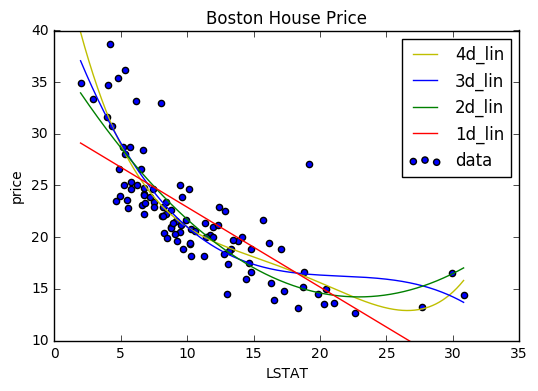

In [25]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x), np.max(x), 1000)

y_4d_fit = lin_4d.predict(degree_4.fit_transform(n[:, np.newaxis]))
y_3d_fit = lin_3d.predict(degree_3.fit_transform(n[:, np.newaxis]))
y_2d_fit = lin_2d.predict(degree_2.fit_transform(n[:, np.newaxis]))
y_1d_fit = lin_1d.predict(n[:, np.newaxis])

plt.title("Boston House Price")
plt.scatter(x, y, label='data')
plt.plot(n, y_4d_fit, 'y', label='4d_lin')
plt.plot(n, y_3d_fit, 'b', label='3d_lin')
plt.plot(n, y_2d_fit, 'g', label='2d_lin')
plt.plot(n, y_1d_fit, 'r', label='1d_lin')

plt.ylim(10, 40)#グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()

plt.plot()

### 課題②

In [26]:
x = X['AGE'].values

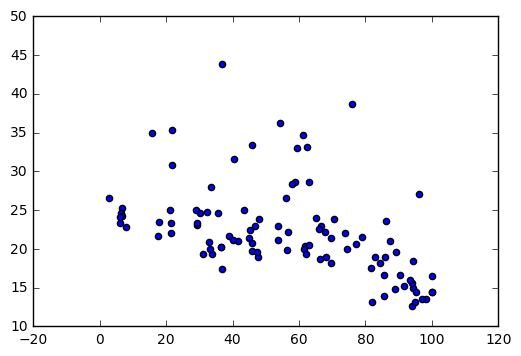

In [27]:
plt.scatter(x, y)

In [28]:
# 線形回帰モデルの箱を作成

from sklearn.linear_model import LinearRegression
lin_1d_age = LinearRegression()

In [29]:
# 線形回帰に学習させる
# sklearnでは、fit関数の引数xは行列にすること！

lin_1d_age.fit(x[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
lin_1d_age.predict(2)

array([ 27.93400253])

In [31]:
lin_1d_age.predict(10)

array([ 27.10453965])

[]

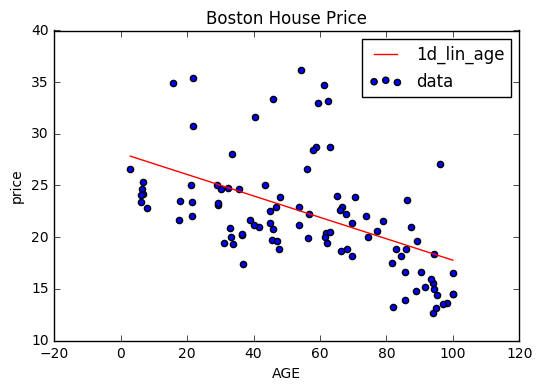

In [32]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x), np.max(x), 1000)
y_1d_fit_age = lin_1d_age.predict(n[:, np.newaxis])

plt.title("Boston House Price")
plt.scatter(x, y, label = 'data')
plt.plot(n, y_1d_fit_age, color='red', label = '1d_lin_age')

plt.ylim(10, 40) #グラフを見やすくするためにｙ軸のプロット範囲を絞っているだけです。
plt.xlabel("AGE")
plt.ylabel("price")
plt.legend()

plt.plot()

In [33]:
lin_1d_age.predict(100)

array([ 17.77308224])

In [34]:
from sklearn.metrics import mean_squared_error

#まずは1次関数の2乗和誤差をみてみましょう
mean_squared_error(y, lin_1d_age.predict(x[:,None]))

26.754508704139507

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
degree_2_age = PolynomialFeatures(degree=2)
x_2_age = degree_2_age.fit_transform(x[:, None])

lin_2d_age = LinearRegression()
lin_2d_age.fit(x_2_age, y)

# 2次関数の2乗和誤差をみてみましょう
mean_squared_error(y, lin_2d_age.predict(x_2_age))

24.397088136515958

In [37]:
degree_3_age = PolynomialFeatures(degree=3)
x_3_age = degree_3_age.fit_transform(x[:, None])

lin_3d_age = LinearRegression()
lin_3d_age.fit(x_3_age, y)

mean_squared_error(y, lin_3d_age.predict(x_3_age))

23.978242199677439

In [38]:
degree_4_age = PolynomialFeatures(degree=4)
x_4_age = degree_4_age.fit_transform(x[:, None])

lin_4d_age = LinearRegression()
lin_4d_age.fit(x_4_age, y)

mean_squared_error(y, lin_4d_age.predict(x_4_age))

23.956816976819287

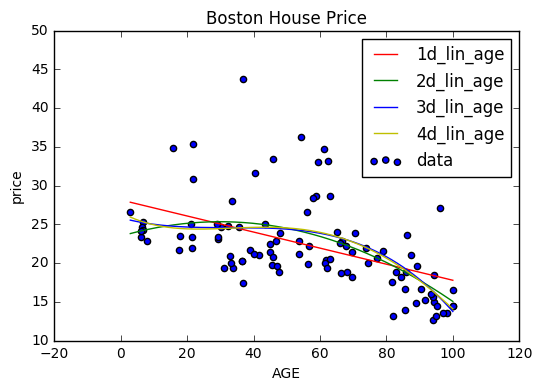

In [39]:
n = np.linspace(np.min(x), np.max(x), 1000)

y_1d_fit_age = lin_1d_age.predict(n[:, np.newaxis])
y_2d_fit_age = lin_2d_age.predict(degree_2_age.fit_transform(n[:, np.newaxis]))
y_3d_fit_age = lin_3d_age.predict(degree_3_age.fit_transform(n[:, np.newaxis]))
y_4d_fit_age = lin_4d_age.predict(degree_4_age.fit_transform(n[:, np.newaxis]))

plt.title('Boston House Price')
plt.scatter(x, y, label='data')
plt.plot(n, y_1d_fit_age, 'r', label='1d_lin_age')
plt.plot(n, y_2d_fit_age, 'g', label='2d_lin_age')
plt.plot(n, y_3d_fit_age, 'b', label='3d_lin_age')
plt.plot(n, y_4d_fit_age, 'y', label='4d_lin_age')

#plt.ylim()
plt.xlabel("AGE")
plt.ylabel("price")
plt.legend()

plt.show()